In [187]:
import os
import glob
import numpy as np
import pandas as pd
import nilearn
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib

In [2]:
%matplotlib inline

# VBM

## Template

In [3]:
from nilearn.image import concat_imgs, mean_img

In [4]:
!ls ../../data_VBM

selec			      sub-031524_sub-031573.tar.gz
sub-031424_sub-031473	      tmp_wf_sub-031624_sub-031673
sub-031424_sub-031473.tar.gz  tmp_wf_sub-031624_sub-031673_mni
sub-031474-sub-031523	      tmp_wf_test_sub
sub-031474-sub-031523.tar.gz  tmp_wf_test_sub_no_fs
sub-031524_sub-031573


In [26]:
!ls ../../../../data/uva_aomic/derivatives/fmriprep/sub-0146/anat/*MNI*GM_probseg.nii.gz

../../../../data/uva_aomic/derivatives/fmriprep/sub-0146/anat/sub-0146_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz


In [5]:
#data_dir = '../../data_VBM/selec/sub-031624_sub-031673/derivatives_mni/smriprep'
data_dir = '../../../../data/uva_aomic/derivatives/fmriprep'
proc_dir = '../../../../data/uva_aomic/derivatives/smri_course'

##### Template from GM probability maps in MNI space

In [5]:
GM_probmap_files = glob.glob(os.path.join(data_dir, "sub-*", "anat", "*MNI*GM_probseg.nii.gz"))

In [31]:
GM_probmaps_4D_img = concat_imgs(GM_probmap_files)
GM_probmap_mean_img = mean_img(GM_probmaps_4D_img)

KeyboardInterrupt: 

In [6]:
GM_probmap_mean_img = nib.load(os.path.join(proc_dir, "GM226.nii.gz"))

##### Resample to 2-mm template

In [6]:
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_to_img

In [39]:
template = load_mni152_template()
GM_probmap_mean_img_2mm = resample_to_img(GM_probmap_mean_img, template)
# Save result
GM_probmap_mean_img_2mm.to_filename(os.path.join(proc_dir, "GM226_2mm.nii.gz"))

##### Plot results

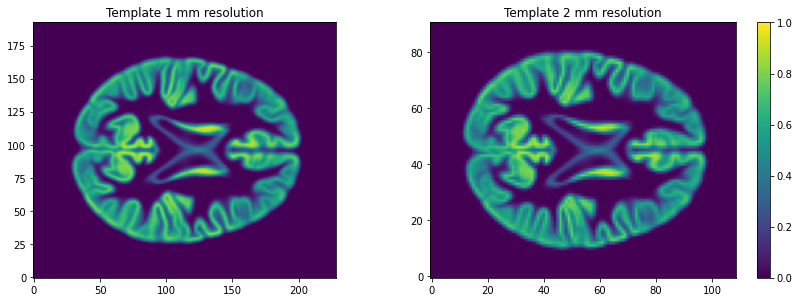

In [48]:
plt.figure(figsize=(12, 8))
n_plots = 2
n_cols = 2
# Plot first figure
plt.subplot(n_plots, n_cols, 1)
plt.imshow(GM_probmap_mean_img.get_fdata()[:, :, 100], origin="lower", vmin=0, vmax=1)
plt.title('Template 1 mm resolution')
# Plot first figure
plt.subplot(n_plots, n_cols, 2)
plt.imshow(GM_probmap_mean_img_2mm.get_fdata()[:, :, 47], origin="lower", vmin=0, vmax=1)
plt.title('Template 2 mm resolution')
plt.colorbar();
plt.tight_layout() # Magic command to clean the overall plot

### Compute deformations (do not run in this notebook)

In [ ]:
%%bash
#NATIVE_GM_MAPS=(data/derivatives_mni/smriprep/sub-*/anat/sub-+([0-9])_label-GM_probseg.nii.gz)
NATIVE_GM_MAPS=(data/derivatives/fmriprep/sub-*/anat/sub-+([0-9])_label-GM_probseg.nii.gz)
for GM_MAP in ${NATIVE_GM_MAPS[@]}; do 
    SUBJ_NAME=${GM_MAP%%_label*}
    fsl_reg ${GM_MAP} GM226_2mm.nii.gz \
            data/derivatives/smri_course/${SUBJ_NAME}_space-GM226_label-GM_probseg \
            -fnirt "--config=GM_2_MNI152GM_2mm.cnf --jout=${SUBJ_NAME}_J"
done

### Estimate GM modulated maps

In [13]:
from nilearn.image import math_img, smooth_img

In [44]:
proc_dir = '../../../../data/uva_aomic/derivatives/smri_course'

In [57]:
!ls ../../../../data/uva_aomic/derivatives/smri_course/sub-+([0-9])

/usr/bin/sh: 1: Syntax error: "(" unexpected


In [60]:
subj_dirs = sorted(glob.glob(os.path.join(proc_dir, "sub-*")))
# Calculating 
for subj_dir in subj_dirs:
    subj_name = os.path.basename(subj_dir)
    print(f"==={subj_name}")
    # Get GM probability map in template space
    warped_GM_file = os.path.join(subj_dir, f"{subj_name}_space-GM226_label-GM_probseg.nii.gz")
    warped_GM = nib.load(warped_GM_file)
    # Get scaling factors (trace of Jacobian)
    J_map_file = os.path.join(subj_dir, f"{subj_name}_J.nii.gz")
    J_map = nib.load(J_map_file)
    # Compute modulated map
    modulated_map = math_img("img1 * img2", img1=warped_GM, img2=J_map)
    # Save modulated image
    modulated_map_file = os.path.join(subj_dir, f"{subj_name}_space-GM226_label-GM_mod.nii.gz")
    modulated_map.to_filename(modulated_map_file)

===sub-0001
===sub-0002
===sub-0003
===sub-0004
===sub-0005
===sub-0006
===sub-0007
===sub-0008
===sub-0009
===sub-0010
===sub-0011
===sub-0012
===sub-0013
===sub-0014
===sub-0015
===sub-0016
===sub-0017
===sub-0018
===sub-0019
===sub-0020
===sub-0021
===sub-0022
===sub-0023
===sub-0024
===sub-0025
===sub-0026
===sub-0027
===sub-0028
===sub-0029
===sub-0030
===sub-0031
===sub-0032
===sub-0033
===sub-0034
===sub-0035
===sub-0036
===sub-0037
===sub-0038
===sub-0039
===sub-0040
===sub-0041
===sub-0042
===sub-0043
===sub-0044
===sub-0045
===sub-0046
===sub-0047
===sub-0048
===sub-0049
===sub-0050
===sub-0051
===sub-0052
===sub-0053
===sub-0054
===sub-0055
===sub-0056
===sub-0057
===sub-0058
===sub-0059
===sub-0060
===sub-0061
===sub-0062
===sub-0063
===sub-0064
===sub-0065
===sub-0066
===sub-0067
===sub-0068
===sub-0069
===sub-0070
===sub-0071
===sub-0072
===sub-0073
===sub-0074
===sub-0075
===sub-0076
===sub-0077
===sub-0078
===sub-0079
===sub-0080
===sub-0081
===sub-0082
===sub-0083
===s

#### Some processing before stats

##### Create 4D file

In [142]:
#proc_dir = '../../../../data/uva_aomic/derivatives/vbm'
proc_dir = '../../../../data/uva_aomic/derivatives/smri_course'

In [143]:
#modulated_map_files = sorted(glob.glob(os.path.join(proc_dir, "sub*", "*GMvolume.nii.gz")))
modulated_map_files = sorted(glob.glob(os.path.join(proc_dir, "sub*", "*GM_mod.nii.gz")))

In [146]:
#modulated_maps_4D = concat_imgs(modulated_map_files)
#modulated_maps_4D_file = os.path.join(proc_dir, "cohort_GMvolume.nii.gz")
modulated_maps_4D_file = os.path.join(proc_dir, "cohort_space-GM226_label-GM_mod.nii.gz")
modulated_maps_4D = nib.load(modulated_maps_4D_file)

In [147]:
#modulated_maps_mean = mean_img(modulated_maps_4D)
#modulated_maps_mean_file = os.path.join(proc_dir, "cohort_GMvolume_mean.nii.gz")
modulated_maps_mean_file = os.path.join(proc_dir, "cohort_space-GM226_label-GM_mod_mean.nii.gz")
modulated_maps_mean = nib.load(modulated_maps_mean_file)

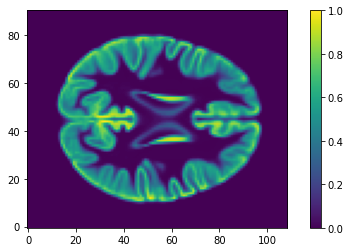

In [148]:
plt.figure(figsize=(8, 4))
plt.imshow(modulated_maps_mean.get_fdata()[:, :, 48], origin="lower", vmin=0, vmax=1)
plt.colorbar();

##### Create GM mask

In [159]:
GM_mask = math_img('img > 0.05', img=modulated_maps_mean)
GM_mask.to_filename(os.path.join(proc_dir, "GM226_mask.nii.gz"))

In [156]:
np.count_nonzero(GM_mask.get_fdata())

196314

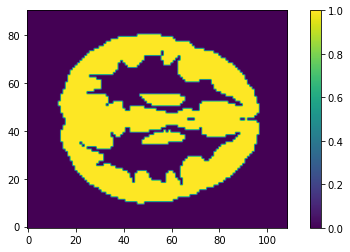

In [157]:
plt.figure(figsize=(8, 4))
plt.imshow(GM_mask.get_fdata()[:, :, 50], origin="lower", vmin=0, vmax=1)
plt.colorbar();

##### Smooth the 4D modulated maps image and save it before analysis

In [16]:
#fwhm_mm = 3
#modulated_maps_4D_smoothed = smooth_img(modulated_maps_4D, fwhm_mm)
#modulated_maps_4D_smoothed_file = os.path.join(proc_dir, "cohort_space-GM226_label-GMmod_s3mm.nii.gz")
#modulated_maps_4D_smoothed.to_filename(modulated_maps_4D_smoothed_file)

#modulated_maps_4D_smoothed_file = os.path.join(proc_dir, "cohort_space-GM226_label-GMvolume_s3mm.nii.gz")
modulated_maps_4D_smoothed_file = os.path.join(proc_dir, "cohort_space-GM226_label-GM_mods3.nii.gz")
modulated_maps_4D_smoothed = nib.load(modulated_maps_4D_smoothed_file)

In [17]:
# from nilearn.input_data import NiftiMasker
# nifti_masker = NiftiMasker(
#     mask_img=GM_mask,
#     standardize=False,
#     smoothing_fwhm=3)
# gm_maps_masked = nifti_masker.fit_transform(modulated_maps_4D_img)

In [18]:
modulated_maps_4D_smoothed.shape

(91, 109, 91, 226)

### Statistical model

In [158]:
proc_dir

'../../../../data/uva_aomic/derivatives/smri_course'

In [20]:
data_dir

'../../../../data/uva_aomic/derivatives/fmriprep'

In [21]:
bids_dir = "../../../../data/uva_aomic"

In [29]:
subjects_info_file = os.path.join(bids_dir, 'participants.tsv') 
subjects_info = pd.read_csv(subjects_info_file, sep='\t')
subjects_info

,participant_id,age,sex,BMI,handedness,education_category,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,25.50,M,21.0,right,academic,33.0,23,40,52,47,32
1,sub-0002,23.25,F,22.0,right,academic,19.0,22,47,34,53,46
2,sub-0003,25.00,F,23.0,right,applied,29.0,26,42,37,48,48
3,sub-0004,20.00,F,18.0,right,academic,24.0,32,42,36,48,52
4,sub-0005,24.75,M,27.0,right,academic,24.0,32,51,41,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...
221,sub-0222,22.00,F,20.0,right,academic,30.0,41,35,51,48,42
222,sub-0223,20.75,F,23.0,left,applied,26.0,33,41,54,36,41
223,sub-0224,21.75,M,20.0,right,academic,34.0,22,45,47,46,46
224,sub-0225,20.25,F,28.0,right,academic,27.0,48,32,43,42,37


In [30]:
subjects_info.loc[subjects_info_withna.isnull().any(axis=1), :]

,participant_id,age,sex,BMI,handedness,education_category,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
104,sub-0105,NaN,NaN,NaN,NaN,NaN,NaN,13,43,35,39,53
198,sub-0199,NaN,F,NaN,NaN,applied,16.0,41,52,41,46,59


In [38]:
subjects_info['age'].fillna(subjects_info['age'].mean(), inplace=True)
subjects_info['sex'].fillna(subjects_info['sex'].mode()[0], inplace=True)

#### Design matrix

In [40]:
design_matrix = subjects_info[["participant_id", "age", "sex"]].set_index("participant_id")
design_matrix = pd.get_dummies(design_matrix, columns=["sex"], drop_first=True)
design_matrix["intercept"] = 1
design_matrix

,age,sex_M,intercept
participant_id,,,
sub-0001,25.50,1,1
sub-0002,23.25,0,1
sub-0003,25.00,0,1
sub-0004,20.00,0,1
sub-0005,24.75,1,1
...,...,...,...
sub-0222,22.00,0,1
sub-0223,20.75,0,1
sub-0224,21.75,1,1


In [41]:
design_matrix.to_csv(os.path.join(proc_dir, "design.tsv"), sep="\t", index=False, header=False)

#### Contrast

In [42]:
contrast_matrix = pd.DataFrame([dict(zip(design_matrix.columns, [1, 0, 0]))])
contrast_matrix

,age,sex_M,intercept
0,1,0,0


In [43]:
contrast_matrix.to_csv(os.path.join(proc_dir, "contrasts.tsv"), sep="\t", index=False, header=False)

#### Run in FSL

In [ ]:
%%bash
Text2Vest design.tsv design.mat
Text2Vest contrasts.tsv design.con
randomise -i derivatives/vbm/cohort_space-GM226_label-GMvolume_s3mm \
          -o derivatives/vbm/cohort_space-GM226_label-GMvolume_s3mm \
          -m derivatives/vbm/GM226_mask.nii.gz \
          -d derivatives/vbm/design.mat \
          -t derivatives/vbm/design.con -n 1000 -T -V

In [28]:
proc_dir

'../../../../data/uva_aomic/derivatives/vbm'

In [29]:
!ls ../../../../data/uva_aomic/derivatives/vbm

cohort_GMvolume_mean.nii.gz		       sub-0052  sub-0111  sub-0170
cohort_GMvolume.nii.gz			       sub-0053  sub-0112  sub-0171
cohort_space-GM226_label-GMvolume_s3mm.nii.gz  sub-0054  sub-0113  sub-0172
contrasts.tsv				       sub-0055  sub-0114  sub-0173
design.con				       sub-0056  sub-0115  sub-0174
design.mat				       sub-0057  sub-0116  sub-0175
design.tsv				       sub-0058  sub-0117  sub-0176
GM226_mask.nii.gz			       sub-0059  sub-0118  sub-0177
sub-0001				       sub-0060  sub-0119  sub-0178
sub-0002				       sub-0061  sub-0120  sub-0179
sub-0003				       sub-0062  sub-0121  sub-0180
sub-0004				       sub-0063  sub-0122  sub-0181
sub-0005				       sub-0064  sub-0123  sub-0182
sub-0006				       sub-0065  sub-0124  sub-0183
sub-0007				       sub-0066  sub-0125  sub-0184
sub-0008				       sub-0067  sub-0126  sub-0185
sub-0009				       sub-0068  sub-0127  sub-0186
sub-0010				       sub-0069  sub-0128  sub-0187
sub-0011				       sub-0070  sub-0129  sub-0188
sub-0012			

#### Using nilearn

##### Second level

In [182]:
design_matrix

,age,sex_M,intercept
participant_id,,,
sub-0001,25.50,1,1
sub-0002,23.25,0,1
sub-0003,25.00,0,1
sub-0004,20.00,0,1
sub-0005,24.75,1,1
...,...,...,...
sub-0222,22.00,0,1
sub-0223,20.75,0,1
sub-0224,21.75,1,1


In [191]:
from nilearn.glm.second_level import SecondLevelModel

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [200]:
from nilearn.glm import threshold_stats_img

In [195]:
second_level_model = SecondLevelModel(smoothing_fwhm=3.0, mask_img=GM_mask)
second_level_model.fit(modulated_map_files,
                       design_matrix=design_matrix)

SecondLevelModel(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f4c2650ffd0>,
                 smoothing_fwhm=3.0)

In [199]:
z_map = second_level_model.compute_contrast(second_level_contrast=[1, 0, 0],
                                            output_type='z_score')

In [201]:
threshold_stats_img?

In [230]:
z_map_thr, threshold = threshold_stats_img(z_map, mask_img=GM_mask, alpha=.05, 
                                           height_control='fpr', cluster_threshold=50)
threshold

1.9599639845400545

In [226]:
threshold_stats_img?

In [207]:
threshold

inf

In [ ]:


display = plotting.plot_stat_map(
    z_map, threshold=threshold, colorbar=True, display_mode='z',
    cut_coords=[-4, 26],
    title='age effect on grey matter density (FDR = .05)')
plotting.show()

In [ ]:
Out:

SecondLevelModel(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f4915a961f0>,
                 smoothing_fwhm=2.0)
Estimating the contrast is very simple. We can just provide the column name of the design matrix.

z_map = second_level_model.compute_contrast(second_level_contrast=[1, 0, 0],
                                            output_type='z_score')
We threshold the second level contrast at uncorrected p < 0.001 and plot it.

from nilearn import plotting
from nilearn.glm import threshold_stats_img
_, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr')
print('The FDR=.05-corrected threshold is: %.3g' % threshold)

display = plotting.plot_stat_map(
    z_map, threshold=threshold, colorbar=True, display_mode='z',
    cut_coords=[-4, 26],
    title='age effect on grey matter density (FDR = .05)')
plotting.show()

In [160]:
from nilearn.input_data import NiftiMasker

In [161]:
from nilearn.mass_univariate import permuted_ols

In [162]:
nifti_masker = NiftiMasker(
    mask_img=GM_mask,
    standardize=False,
    smoothing_fwhm=3) 

In [164]:
gm_maps_masked = nifti_masker.fit_transform(modulated_map_files)

In [73]:
#confounding_vars = np.hstack((design_matrix["sex_M"].values.reshape((1,-1)).T,
#                              np.ones((design_matrix["age"].shape[0], 1))))

In [165]:
age_predictor = design_matrix["age"].values.reshape((1,-1)).T

In [166]:
sex_confound = design_matrix["sex_M"].values.reshape((1,-1)).T

In [167]:
gm_maps_masked.shape

(226, 196314)

In [176]:
# Statistical inference
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age_predictor, gm_maps_masked, sex_confound, two_sided_test=True,
    model_intercept=True, n_perm=10000, verbose=1,  n_jobs=40) 
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(signed_neg_log_pvals)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  40 | elapsed:  4.0min remaining: 75.5min
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:  5.8min finished


In [174]:
permuted_ols?

In [169]:
from nilearn.plotting import plot_stat_map

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



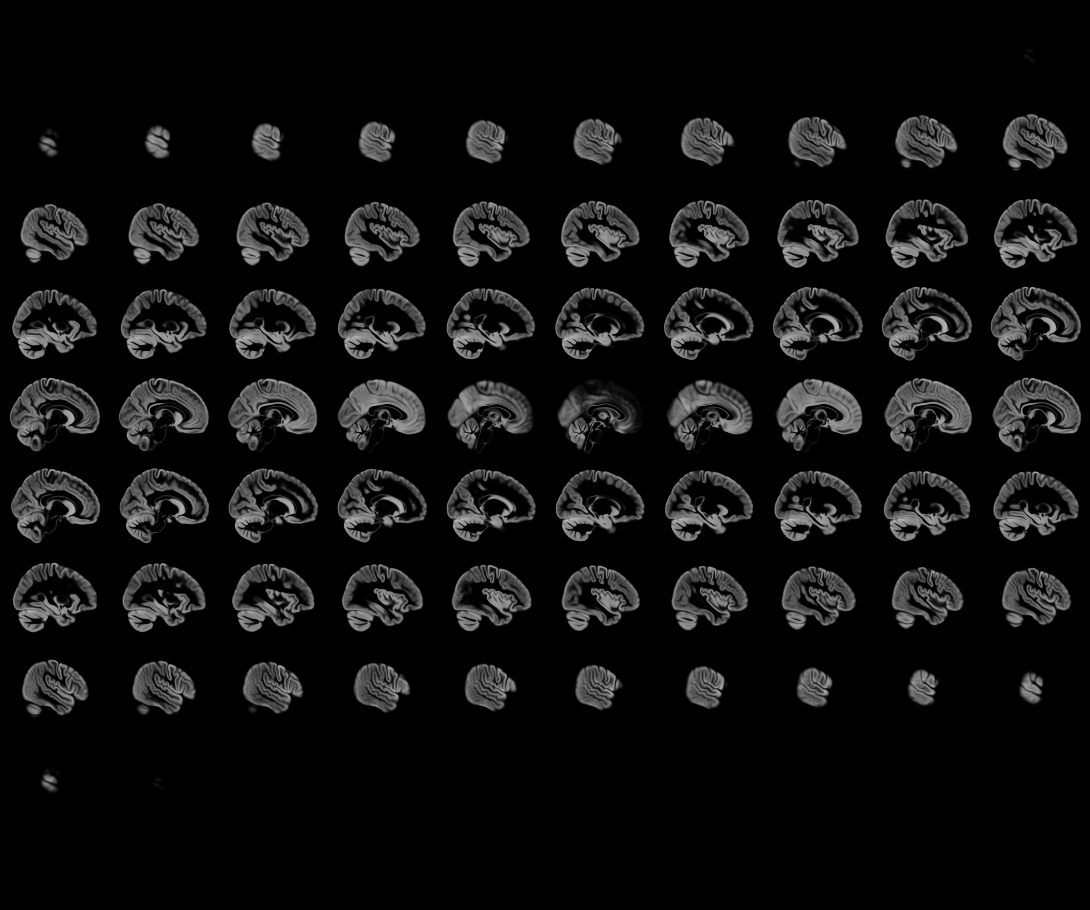
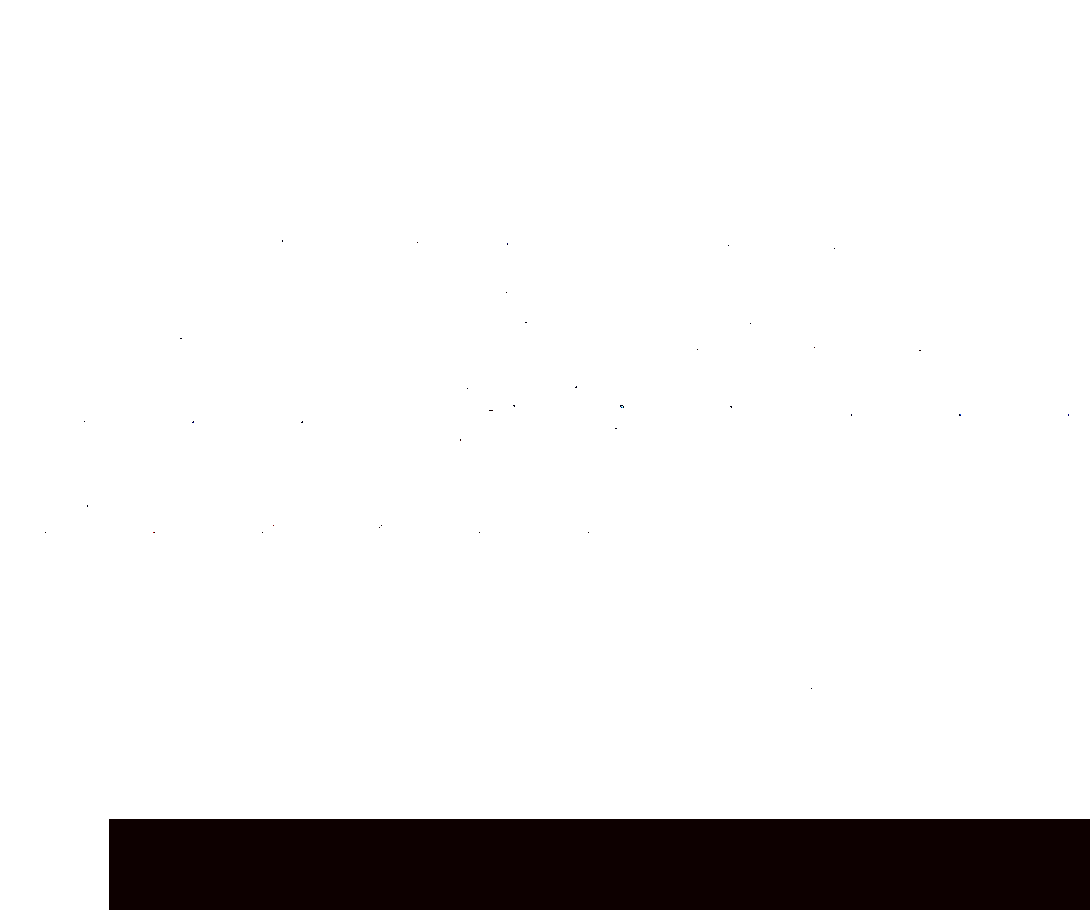

In [181]:
plotting.view_img(signed_neg_log_pvals_unmasked, bg_img=modulated_maps_mean)

In [178]:
tscores_unmasked2 = nifti_masker.inverse_transform(t_scores_original_data)

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



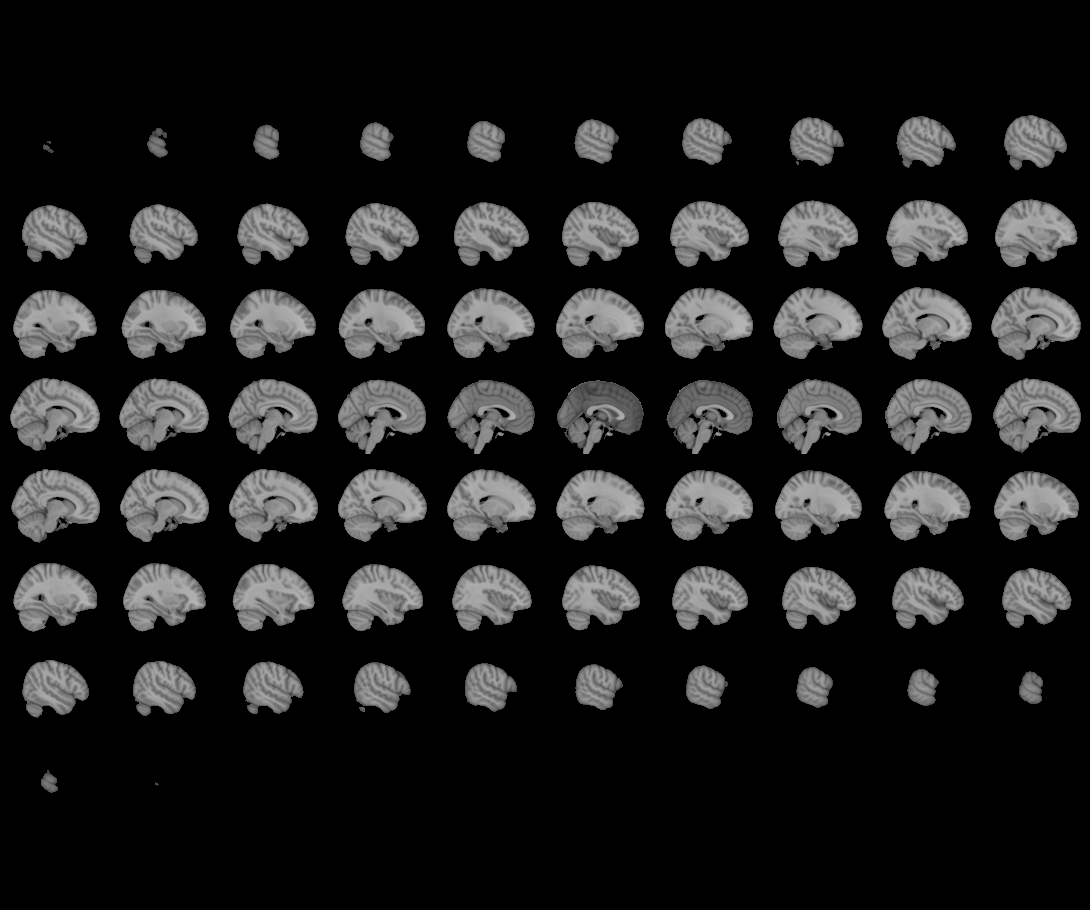
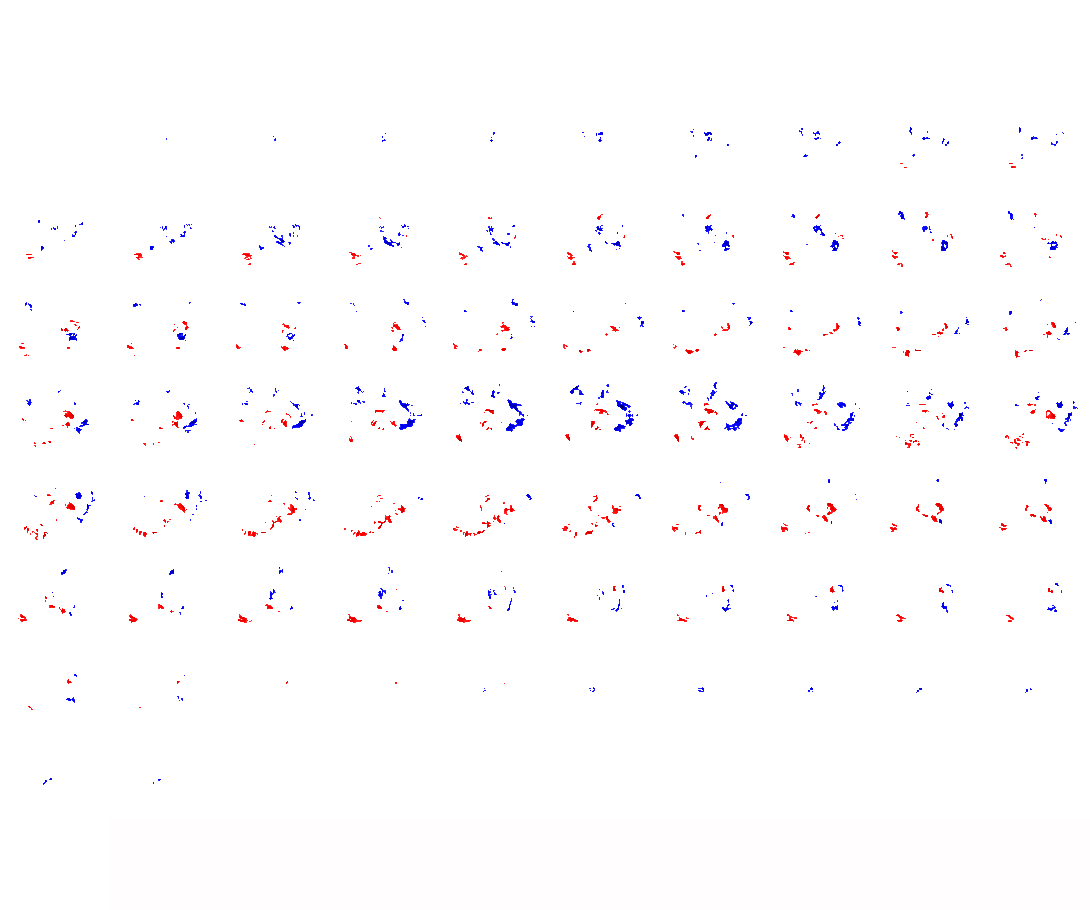

In [231]:
plotting.view_img(z_map_thr, threshold=threshold, cmap="seismic")

In [222]:
plotting.view_img?


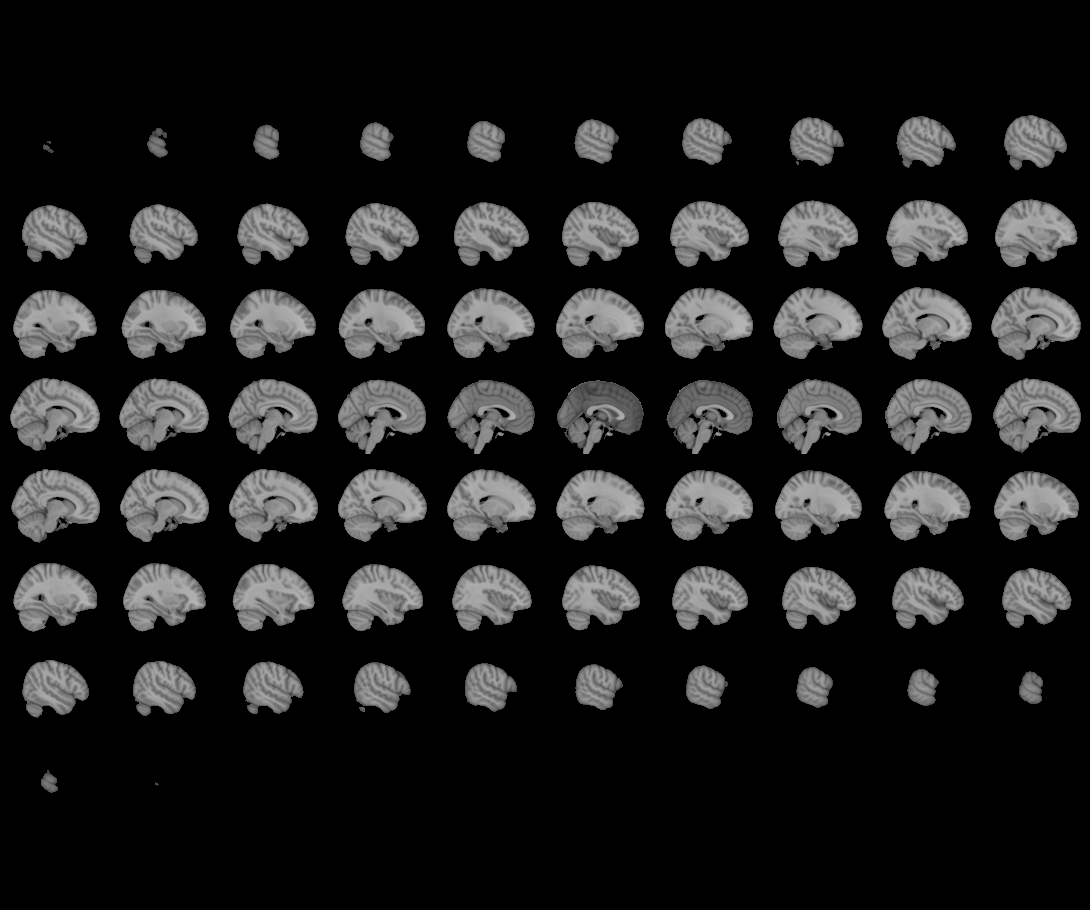
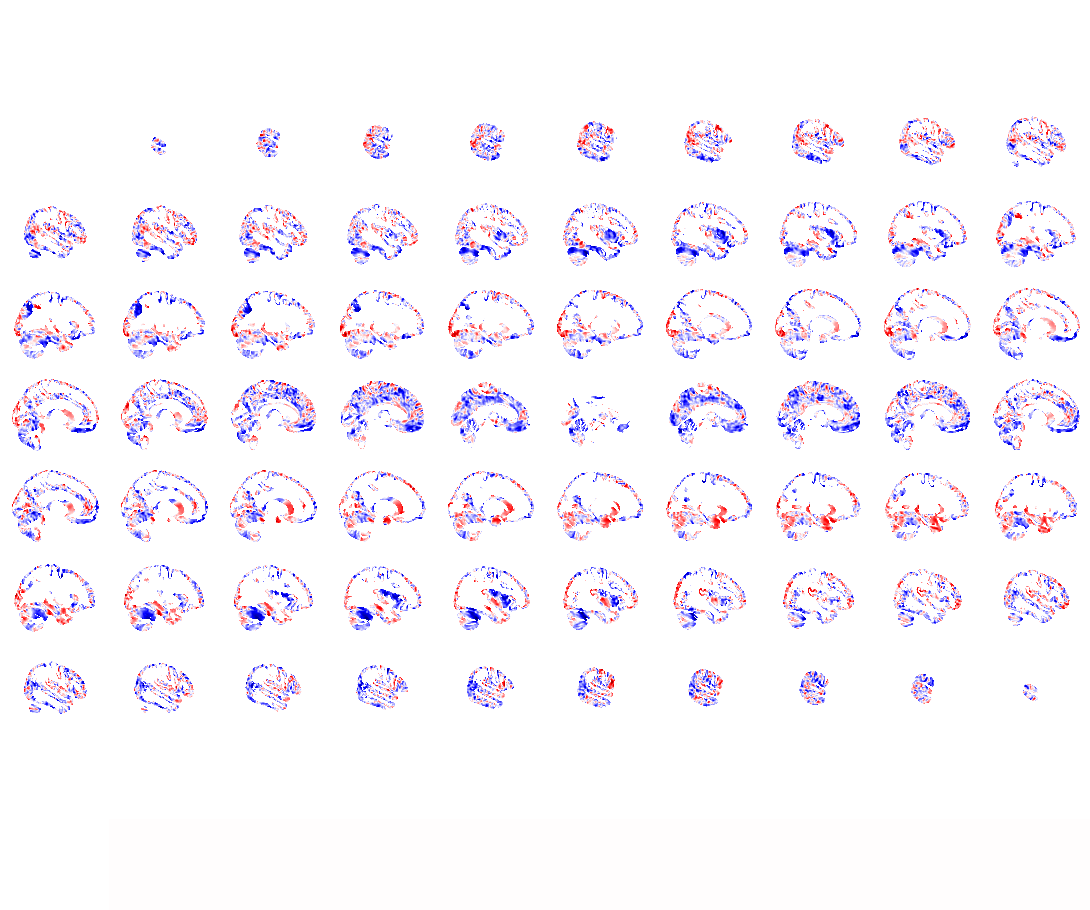

In [141]:
plotting.view_img(tscores_unmasked, cmap="seismic")

In [152]:
plotting.view_img?

In [109]:
# Show results
threshold = -np.log10(0.5)  # 10% corrected
fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')
plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=modulated_maps_mean_img,
              threshold=threshold, cmap=plt.cm.RdBu_r,
              display_mode='z', cut_coords=[-10],
              figure=fig)

NameError: name 'modulated_maps_mean_img' is not defined

<Figure size 396x540 with 0 Axes>

In [ ]:
n_detections = (get_data(signed_neg_log_pvals_unmasked) > threshold).sum()
print('\n%d detections' % n_detections)
show()

In [93]:
from nilearn.image import get_data
from nilearn import datasets
n_subjects = 100

In [94]:
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects=n_subjects)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)


Dataset created in /home/michael/nilearn_data/oasis1



Downloaded 905208634 of 905208634 bytes (100.0%,    0.0s remaining) ...done. (39 seconds, 0 min)
Extracting data from /home/michael/nilearn_data/oasis1/e1dfc62a5c61f6d1d9b0266c7bebffef/archive_dartel.tgz..... done.
/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [96]:
age

array([74., 55., 73., 28., 18., 24., 21., 20., 74., 52., 30., 81., 19.,
       76., 82., 21., 39., 89., 48., 80., 69., 82., 24., 58., 86., 21.,
       65., 88., 89., 80., 51., 84., 27., 23., 70., 38., 62., 80., 21.,
       47., 29., 64., 57., 20., 48., 24., 78., 83., 21., 20., 72., 46.,
       20., 79., 20., 73., 48., 77., 90., 71., 67., 33., 63., 49., 60.,
       69., 43., 83., 18., 20., 64., 25., 25., 18., 75., 81., 70., 47.,
       21., 40., 20., 18., 22., 66., 28., 47., 23., 67., 19., 29., 18.,
       19., 24., 20., 81., 20., 25., 61., 84., 23.])

In [ ]:

# Show results
threshold = -np.log10(0.1)  # 10% corrected
fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')
display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[z_slice],
                        figure=fig)
title = ('Negative $\\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)
n_detections = (get_data(signed_neg_log_pvals_unmasked) > threshold).sum()
print('\n%d detections' % n_detections)
show()

In [80]:
gm_maps_masked.shape

(50, 248633)

In [ ]:
for g in `$FSLDIR/bin/imglob *_struc.*` ; do
  echo $g
  echo "${FSLDIR}/bin/fsl_reg ${g}_GM template_GM ${g}_GM_to_template_GM -fnirt \"--config=GM_2_MNI152GM_2mm.cnf --jout=${g}_JAC_nl\"; \
        $FSLDIR/bin/fslmaths ${g}_GM_to_template_GM -mul ${g}_JAC_nl ${g}_GM_to_template_GM_mod -odt float" >> fslvbm3a
done

\$FSLDIR/bin/fslmerge -t GM_merg     \`\${FSLDIR}/bin/imglob ../struc/*_GM_to_template_GM.*\`
\$FSLDIR/bin/fslmerge -t GM_mod_merg \`\${FSLDIR}/bin/imglob ../struc/*_GM_to_template_GM_mod.*\`

\$FSLDIR/bin/fslmaths GM_merg -Tmean -thr 0.01 -bin GM_mask -odt char

/bin/cp ../design.* .

for i in GM_mod_merg ; do
  for j in 2 3 4 ; do
    \$FSLDIR/bin/fslmaths \$i -s \$j \${i}_s\${j} 
    \$FSLDIR/bin/randomise -i \${i}_s\${j} -o \${i}_s\${j} -m GM_mask -d design.mat -t design.con -V
  done
done

echo "Once this has finished, run randomise with 5000 permutations on the 'best' smoothed 4D GM_mod_merg. We recommend using the -T (TFCE) option. For example:"
echo "randomise -i GM_mod_merg_s3 -o GM_mod_merg_s3 -m GM_mask -d design.mat -t design.con -n 5000 -T -V"

In [10]:
!ls

1_sMRI_modalities.ipynb			  6_sMRI_StatisticalAnalysis.ipynb
2_sMRI_image_cleanup.ipynb		  7_sMRI_reproducibility.ipynb
3_sMRI_spatial_norm.ipynb		  Stats.ipynb
4_sMRI_segmentation_quantification.ipynb


#### More memory efficient ?

In [36]:
# Get first GM probability map
i_probmap = 0
GM_probmap_file = GM_probmap_files[0]
GM_probmap = nib.load(GM_probmap_file)
GM_probmap_data = GM_probmap.get_fdata()
GM_probmap_affine = GM_probmap.affine

In [41]:
# Create mean image by summing each image and dividing by total number of images
for i_probmap in range(1, len(GM_probmap_files)):
    print(f"Probmap {i_probmap} (0-indexed)")
    tmp_GM_probmap_file = GM_probmap_files[i_probmap]
    tmp_GM_probmap = nib.load(tmp_GM_probmap_file)
    if not np.array_equal(tmp_GM_probmap.affine, GM_probmap_affine):
        print("Warning, different affines")
    GM_probmap_data += tmp_GM_probmap.get_fdata()
GM_probmap_mean = GM_probmap_data / len(GM_probmap_files)

Probmap 1 (0-indexed)
Probmap 2 (0-indexed)
Probmap 3 (0-indexed)
Probmap 4 (0-indexed)
Probmap 5 (0-indexed)
Probmap 6 (0-indexed)
Probmap 7 (0-indexed)
Probmap 8 (0-indexed)
Probmap 9 (0-indexed)
Probmap 10 (0-indexed)
Probmap 11 (0-indexed)


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 4))
plt.imshow(GM_probmap_mean[:, :, 100], origin="lower", vmin=0, vmax=1)
plt.colorbar();

In [ ]:
np.array_equal(GM_probmap_mean, GM_probmap_mean_img)